In [6]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import ipysheet
import ipywidgets as widgets
import json

In [2]:
separateur = ";"
PAIRING_FILE = "~/Workspace/pairings/pairings.csv"

In [3]:
df = pd.read_csv(PAIRING_FILE, sep=separateur, index_col=0)

In [4]:
df

,Drukhari 1,Nécrons 1,GK 1,Sistas 1,Orks 1,TS 1
Drukhari 2,10,5,5,10,10,5
SM 2,15,15,20,15,15,15
Admech 2,5,5,10,5,15,10
DG 2,10,10,15,5,5,15
Sistas 2,10,15,10,10,5,15
Custodes 2,15,20,15,10,15,15


In [9]:
result = df.to_json(orient="split")
parsed = json.loads(result)
json.dumps(parsed)

'{"columns": ["Drukhari 1", "N\\u00e9crons 1", "GK 1", "Sistas 1", "Orks 1", "TS 1"], "index": ["Drukhari 2", "SM 2", "Admech 2", "DG 2", "Sistas 2", "Custodes 2"], "data": [[10, 5, 5, 10, 10, 5], [15, 15, 20, 15, 15, 15], [5, 5, 10, 5, 15, 10], [10, 10, 15, 5, 5, 15], [10, 15, 10, 10, 5, 15], [15, 20, 15, 10, 15, 15]]}'

In [5]:
sheet = ipysheet.from_dataframe(df)
widgets.VBox([sheet])
sheet

Sheet(cells=(Cell(column_end=0, column_start=0, numeric_format='0[.]0', row_end=5, row_start=0, squeeze_row=Fa…

In [6]:
def has_duplicates(listOfElements):
    if len(listOfElements) == len(set(listOfElements)):
        return False
    else:
        return True

In [7]:
def sum_score_of_pairing(pairing):
    score = 0
    for (x, y) in pairing:
        score += df[x][y]
    return score

In [16]:
output = widgets.Output()

@output.capture(clear_output=False,wait=True) 
def launch_pairing(instance):
    df = ipysheet.to_dataframe(sheet)
    team1=df.columns.values.tolist()
    team2=df.index.values.tolist()
    list_j1 = list(itertools.product([team1[0]], team2))
    list_j2 = list(itertools.product([team1[1]], team2))
    list_j3 = list(itertools.product([team1[2]], team2))
    list_j4 = list(itertools.product([team1[3]], team2))
    list_j5 = list(itertools.product([team1[4]], team2))
    list_j6 = list(itertools.product([team1[5]], team2))
    total = list(itertools.product(list_j1, list_j2, list_j3, list_j4, list_j5, list_j6))
    pairings = filter(lambda pairing: not has_duplicates([x[1] for x in pairing]), total)
    list_pairings = list(pairings)
    df_pairings = pd.DataFrame(pd.Series(list_pairings), columns=["Pairings"])
    df_pairings["Estimation"] = df_pairings["Pairings"].apply(lambda x: sum_score_of_pairing(x))
    df_hist = df_pairings.Estimation.value_counts().to_frame('count').reset_index() #.rename(columns={"index":"Estimation en VP", "count":"test"})
    df_hist["Estimation en VP"] = df_hist["index"]
    df_hist["Nombre de pairings"] = df_hist["count"]
    df_hist = df_hist[["Estimation en VP", "Nombre de pairings"]]
    display(df_hist.sort_values(by="Estimation en VP"))
    plt.hist(df_pairings.Estimation)
    plt.title("Répartition des estimations sur les 720 pairings")
    plt.xlabel("Estimation en VP")
    plt.ylabel("Nombre de pairings")
    plt.grid()

Button(description='Lancer le pairing', icon='check', style=ButtonStyle(), tooltip='Lancer le pairing')

Output()

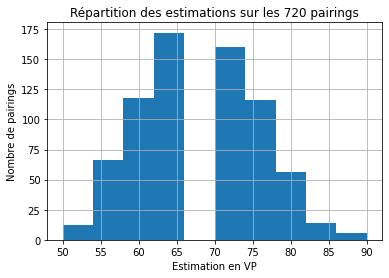

In [17]:
button = widgets.Button(
    description='Lancer le pairing',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Lancer le pairing',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
button.on_click(launch_pairing)
display(button)
output